<a href="https://colab.research.google.com/github/thisishasan/slda/blob/main/health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download a Heart Failure Clinical Records dataset; the dataset originally source from UC Irvine Machine Learning Repository [https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records]

In [82]:
!wget -nc 'https://raw.githubusercontent.com/thisishasan/slda/refs/heads/main/dataset.csv'

File ‘dataset.csv’ already there; not retrieving.



Import the necessary libraries

In [83]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

Read and load the dataset csv file into a data frame

In [84]:
file_path = os.path.join('dataset.csv')
df = pd.read_csv(file_path)

Displays the data frame information


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  death_event               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


By default, displays the top five rows of the data frame


In [86]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Describe the data frame

In [87]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


List all numerical variables

In [88]:
numerical_vars = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

List all categorical variables

In [89]:
categorical_vars = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'death_event']

Checks missing values in the data frame

In [90]:
df.isnull().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


Plot the distribution of Age by Death Event, calulate Skewness and Kurtois

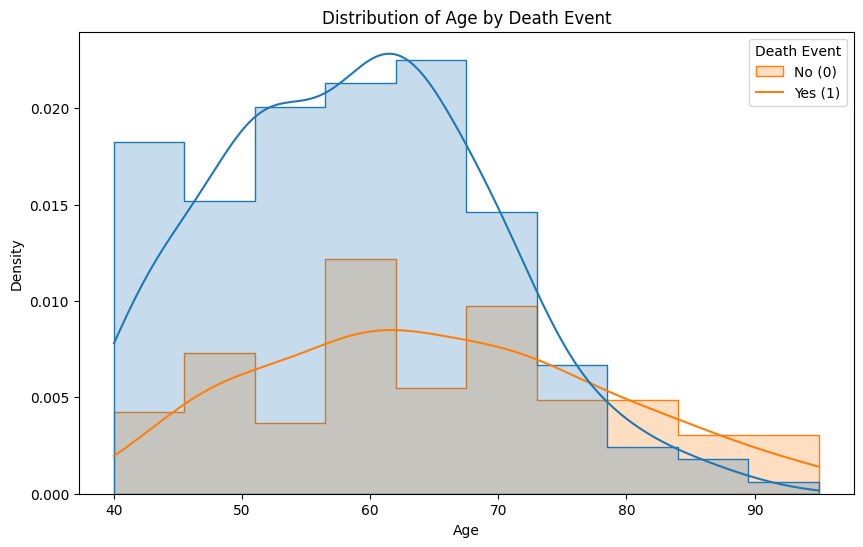

In [91]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='death_event', kde=True, element='step', stat="density")
plt.title('Distribution of Age by Death Event')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Death Event', labels=['No (0)', 'Yes (1)'])
plt.show()


In [92]:
age_skewness = df['age'].skew()
age_kurtosis = df['age'].kurt()

print("Skewness:", age_skewness)
print("Kurtosis:", age_kurtosis)


Skewness: 0.42306190672863536
Kurtosis: -0.18487053195417413


Skewness is 0.423 which indicates a slight positive skew, meaning the tail of the distribution is slightly longer on the right-hand side.

Kurtosis is -0.185 which suggests a distribution that is close to normal but with slightly thinner tails compared to a normal distribution.

Plot the distribution of Creatinine Phosphokinase by Death Event, calulate Skewness and Kurtois


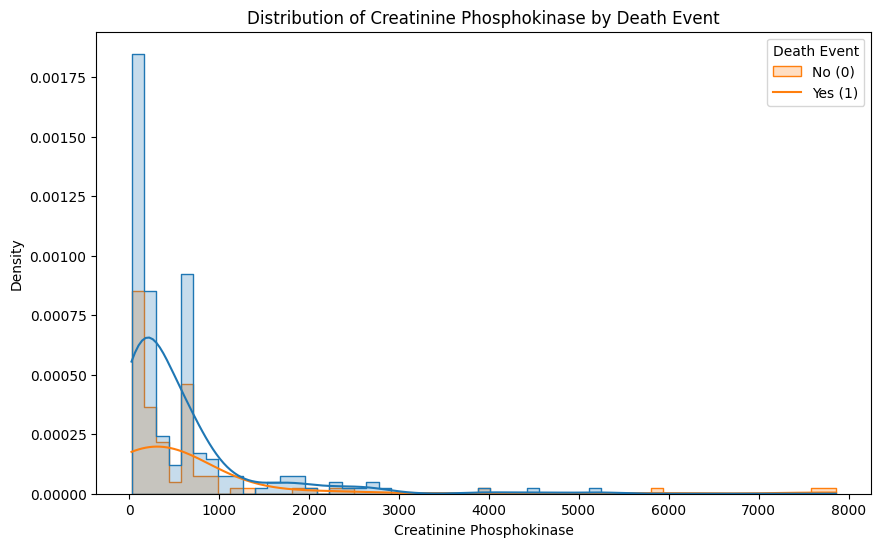

In [93]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='creatinine_phosphokinase', hue='death_event', kde=True, element='step', stat="density")
plt.title('Distribution of Creatinine Phosphokinase by Death Event')
plt.xlabel('Creatinine Phosphokinase')
plt.ylabel('Density')
plt.legend(title='Death Event', labels=['No (0)', 'Yes (1)'])
plt.show()


In [94]:
creatinine_phosphokinase_skewness = df['creatinine_phosphokinase'].skew()
creatinine_phosphokinase_kurtosis = df['creatinine_phosphokinase'].kurt()

print("Skewness:", creatinine_phosphokinase_skewness)
print("Kurtosis:", creatinine_phosphokinase_kurtosis)

Skewness: 4.463110084653752
Kurtosis: 25.1490461965808


Skewness is 4.463 which indicates a highly positive skew, meaning the distribution has a long tail on the right side, with most values concentrated on the left.

Kurtosis is 25.149 which suggests the distribution has extremely heavy tails and a high peak, indicating the presence of outliers.

Visualize the distributions of all numerical variables segmented by death_event

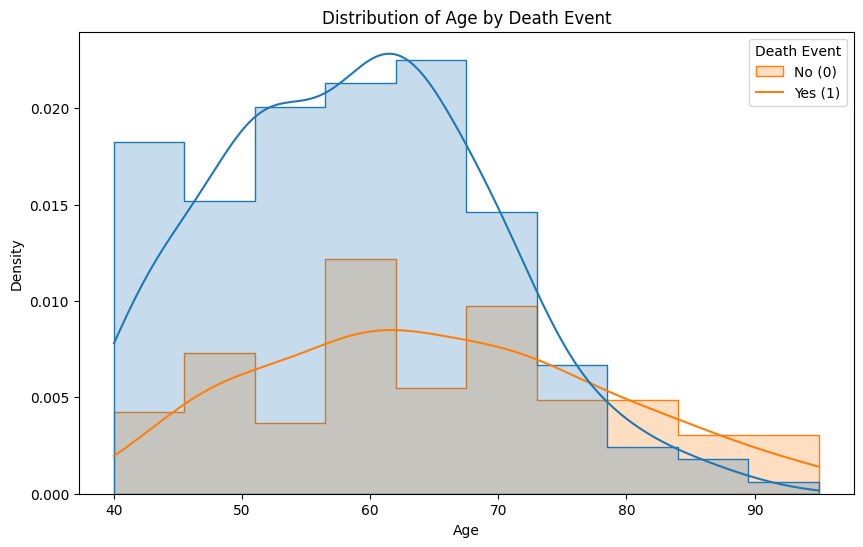

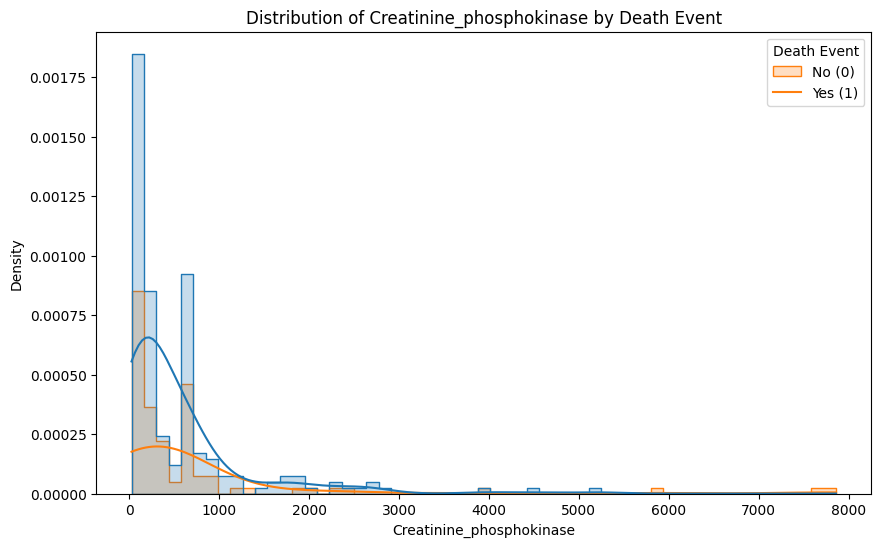

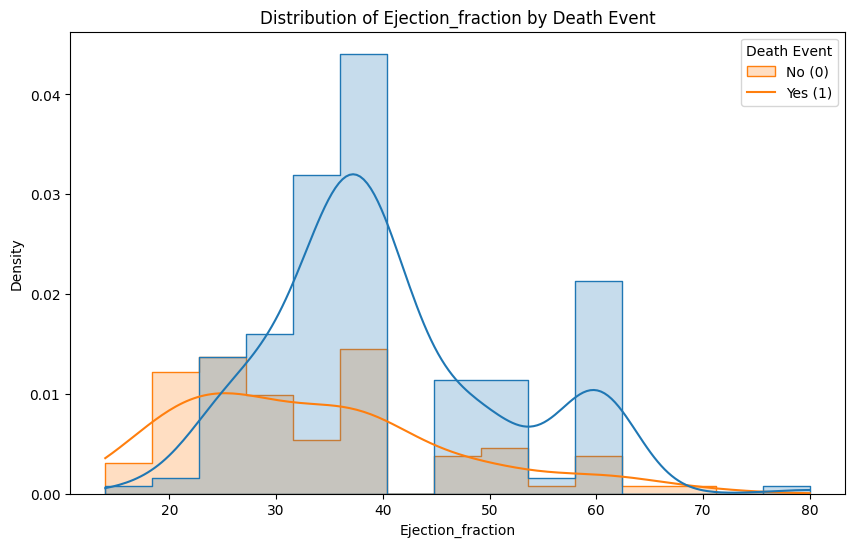

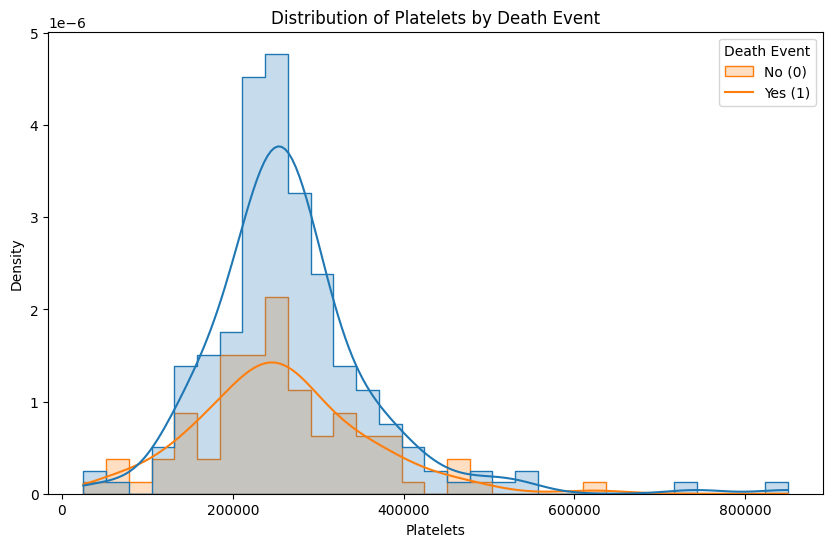

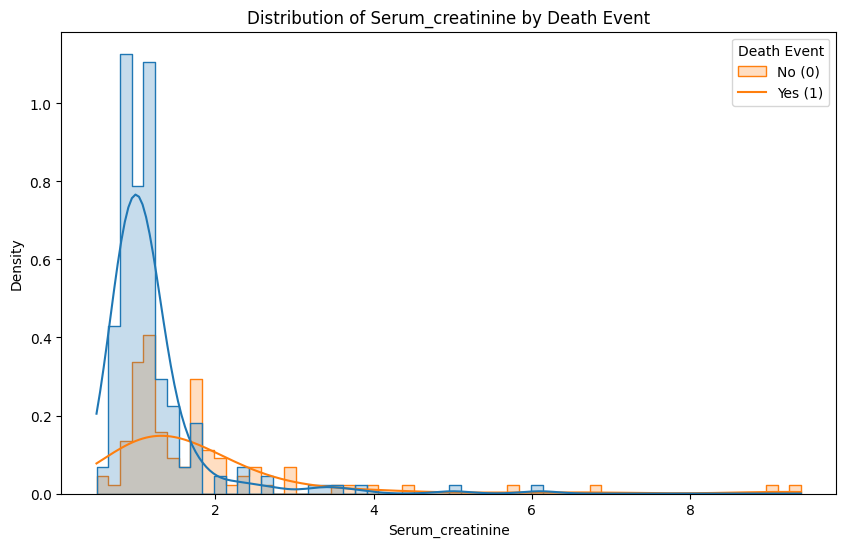

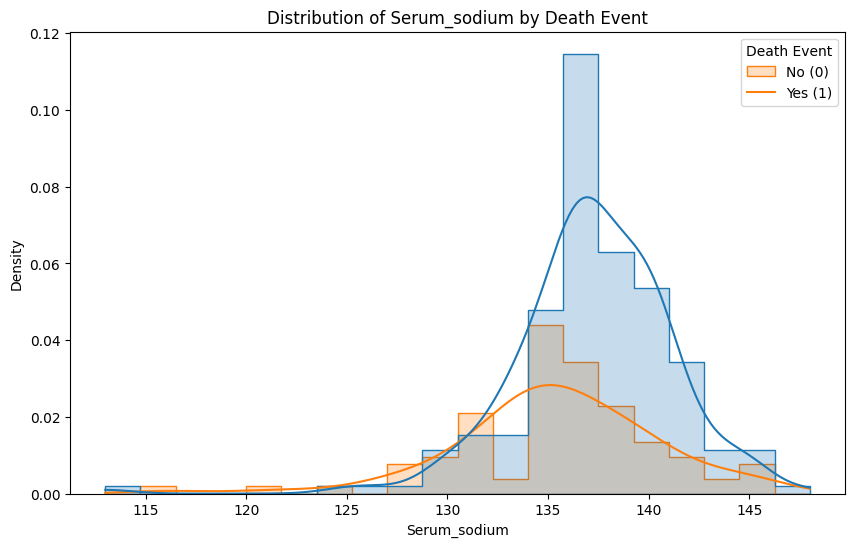

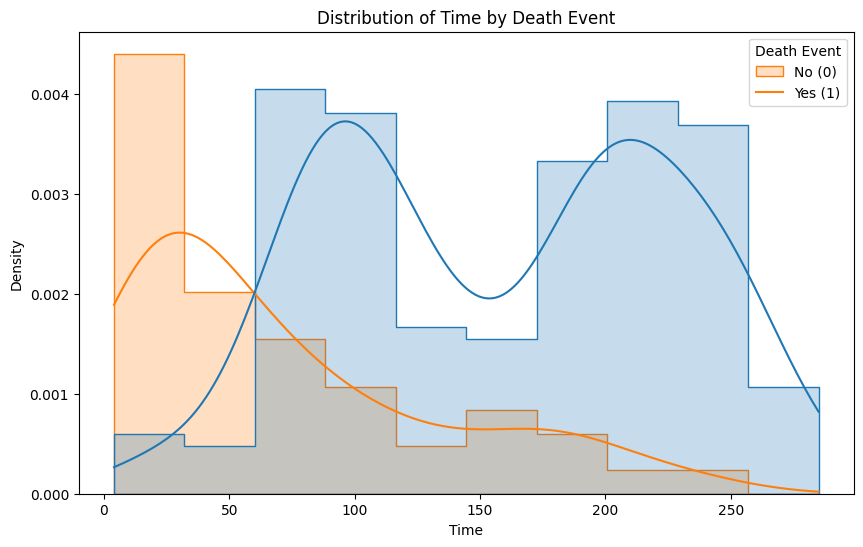

In [95]:
for var in numerical_vars:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=var, hue='death_event', kde=True, element='step', stat="density")
    plt.title(f'Distribution of {var.capitalize()} by Death Event')
    plt.xlabel(var.capitalize())
    plt.ylabel('Density')
    plt.legend(title='Death Event', labels=['No (0)', 'Yes (1)'])
    plt.show()
